<a href="https://colab.research.google.com/github/ashimaarora25/ALA_Final/blob/main/CSML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [186]:
ps_df = pd.read_csv('/content/drive/MyDrive/hcps_puf_2022_formats.csv')
ps_df.head(3)

,zrid,INT1a,MED1,MED2,MED5,ROU2a,ROU2c,ROU2c1,ROU2c2,ROU2c3,...,ED_IMP_FLAG,CON9y,MEN2a,MEN2b,MEN2c,MEN5c,MEN5d,can3a_r,can4a_r,can5a_r
0,1014017P,Yes,Yes,No,No,Missing,Missing,Missing,Missing,Missing,...,No,1,No,No,No,No,No,Yes,Yes,No
1,1014018P,No,Yes,No,No,Missing,Missing,Missing,Missing,Missing,...,No,15,No,No,No,No,No,Yes,Yes,Yes
2,1014026P,Yes,No,Missing,Missing,Missing,Missing,Missing,Missing,Missing,...,Yes,10,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing


In [18]:

len(ps_df.index)
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4414 entries, 0 to 4413
Columns: 465 entries, zrid to can5a_r
dtypes: float64(2), int64(2), object(461)
memory usage: 15.7+ MB


In [5]:
ps_df.dtypes

zrid       object
INT1a      object
MED1       object
MED2       object
MED5       object
            ...  
MEN5c      object
MEN5d      object
can3a_r    object
can4a_r    object
can5a_r    object
Length: 465, dtype: object

In [19]:
ps_df.isnull().sum()

zrid       0
INT1a      0
MED1       0
MED2       0
MED5       0
          ..
MEN5c      0
MEN5d      0
can3a_r    0
can4a_r    0
can5a_r    0
Length: 465, dtype: int64

In [187]:
df = ps_df.convert_dtypes()
df.dtypes

zrid       string
INT1a      string
MED1       string
MED2       string
MED5       string
            ...  
MEN5c      string
MEN5d      string
can3a_r    string
can4a_r    string
can5a_r    string
Length: 465, dtype: object

In [188]:
df = df[['zrid', 'bmi_ind','HYPERTENSION','DIABETES','INT1a','MED1','MED2','ROU2c2','ROU17','CON1','CON6b','CON9c','CON10','CON12a','CON13b',
         'CON14i','CON14j','FOLL_CONF3a','FOLL_CONF3b','FOLL_CONF3c','FOLL_CONF3d','FOLL_CONF5e1','FOLL_CONF5e2','FOLL_CONF5e3','FOLL_CONF5e4','FOLL_CON22a','FOLL_CON22b','FOLL_CON22c','FOLL_CON22d',
         'HEA1','HEA6a','HEA7a','HEA7e_a','HEA7e_b','HEA7e_c','HEA7e_d','HEA18','HEA23','HEA25','HEA27','HEA29','HEA31','HEA32',
         'HEA33','HEA34','HEA35','HEA36','HEA51','HEA52', 'ROU8','ROU9f2','ROU14',
         'numper','NEI7_r','race_simp','dental_sat','smkstat', 'hlthstat','lang_pref','SocialRisk','EDUCATION_IMP',
         'Employmt','fpl','agecat5','sex_at_birth','InsurStatus','SUB10b','SUB9a','SUB1k']]
len(df.index)

4414

In [92]:
df.dtypes

zrid            string
bmi_ind         string
HYPERTENSION    string
DIABETES        string
INT1a           string
                 ...  
sex_at_birth    string
InsurStatus     string
SUB10b          string
SUB9a           string
SUB1k           string
Length: 69, dtype: object

In [155]:
#DO NOT EXECUTE
df = df[~df.astype(str).apply(lambda row: row.str.contains('Missing').any(), axis=1)]
print(df)

Empty DataFrame
Columns: [zrid, bmi_ind, HYPERTENSION, DIABETES, INT1a, MED1, MED2, ROU2c2, ROU17, CON1, CON6b, CON9c, CON10, CON12a, CON13b, CON14i, CON14j, FOLL_CONF3a, FOLL_CONF3b, FOLL_CONF3c, FOLL_CONF3d, FOLL_CONF5e1, FOLL_CONF5e2, FOLL_CONF5e3, FOLL_CONF5e4, FOLL_CON22a, FOLL_CON22b, FOLL_CON22c, FOLL_CON22d, HEA1, HEA6a, HEA7a, HEA7e_a, HEA7e_b, HEA7e_c, HEA7e_d, HEA18, HEA23, HEA25, HEA27, HEA29, HEA31, HEA32, HEA33, HEA34, HEA35, HEA36, HEA51, HEA52, ROU8, ROU9f2, ROU14, numper, NEI7_r, race_simp, dental_sat, smkstat, hlthstat, lang_pref, SocialRisk, EDUCATION_IMP, Employmt, fpl, agecat5, sex_at_birth, InsurStatus, SUB10b, SUB9a, SUB1k]
Index: []

[0 rows x 69 columns]


In [189]:
missing_counts = df.apply(lambda col: col.astype(str).str.strip().str.lower().eq('missing').sum())

# Specify the threshold (e.g., 150)
threshold = 1500

# Drop columns with more than the specified threshold of 'Missing' values
df = df.drop(columns=missing_counts[missing_counts > threshold].index)


In [94]:
df.dtypes

zrid             string
bmi_ind          string
HYPERTENSION     string
DIABETES         string
INT1a            string
MED1             string
CON1             string
CON6b            string
CON10            string
CON12a           string
CON13b           string
CON14i           string
CON14j           string
HEA1             string
HEA7a            string
HEA7e_a          string
HEA7e_b          string
HEA7e_d          string
HEA18            string
HEA27            string
HEA29            string
HEA31            string
HEA32            string
HEA33            string
HEA34            string
HEA35            string
HEA36            string
HEA51            string
HEA52            string
ROU9f2           string
numper           string
NEI7_r           string
race_simp        string
smkstat          string
hlthstat         string
lang_pref        string
SocialRisk       string
EDUCATION_IMP    string
Employmt         string
fpl              string
agecat5          string
sex_at_birth    

In [95]:
df.head(150)

,zrid,bmi_ind,HYPERTENSION,DIABETES,INT1a,MED1,CON1,CON6b,CON10,CON12a,...,smkstat,hlthstat,lang_pref,SocialRisk,EDUCATION_IMP,Employmt,fpl,agecat5,sex_at_birth,InsurStatus
0,1014017P,Obese,No,Yes,Yes,Yes,Good,Yes,No,Missing,...,Non-Smoker,Good,English and non-English Language,Feel generally unsafe,Less than high school,Unemployed,Less than or Equal to 100% FPL,45-64 Years,Female,Publicly Obtained Insurance
1,1014018P,Neither Overweight or Obese,No,Yes,No,Yes,Good,Yes,No,Missing,...,Non-Smoker,Good,English and non-English Language,Feel generally safe,More than high school,Not in Labor Force,201% or More than FPL,45-64 Years,Female,Privately Obtained Insurance
2,1014026P,Neither Overweight or Obese,No,No,Yes,No,Excellent,No,No,No,...,Missing,Excellent,Other non-English Language Only,Feel generally safe,Less than high school,Not in Labor Force,Less than or Equal to 100% FPL,0-17 Years,Male,Medicaid
3,1015012P,Neither Overweight or Obese,Yes,No,No,Yes,Good,No,Yes,No,...,Non-Smoker,Good,English Only,Missing,High school,Not in Labor Force,101% to 200% FPL,18-44 Years,Female,Medicaid
4,1015013P,Obese,No,No,Yes,Yes,Good,Yes,No,No,...,Non-Smoker,Good,English Only,Feel generally safe,More than high school,Not in Labor Force,201% or More than FPL,45-64 Years,Male,Medicare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1025189P,Obese,Yes,No,No,No,Very good,Yes,Yes,Yes,...,Non-Smoker,Very Good,English Only,Feel generally safe,High school,Employed,101% to 200% FPL,45-64 Years,Female,Publicly Obtained Insurance
146,1025190P,Obese,No,Yes,No,Yes,Fair,Yes,No,Missing,...,Non-Smoker,Fair or Poor,English Only,Feel generally safe,More than high school,Unemployed,101% to 200% FPL,18-44 Years,Female,Medicare
147,1025191P,Obese,Yes,No,No,No,Very good,Yes,Yes,Yes,...,Current Smoker,Very Good,English Only,Feel generally safe,High school,Not in Labor Force,Less than or Equal to 100% FPL,45-64 Years,Male,Medicaid
148,1025192P,Obese,No,No,No,Yes,Good,Yes,No,Yes,...,Non-Smoker,Good,English Only,Feel generally safe,More than high school,Employed,101% to 200% FPL,45-64 Years,Female,Privately Obtained Insurance


In [190]:
# Define a mapping for Yes and No
yes_no_mapping = {'Yes': 1, 'No': 0}

# Iterate through the columns
for col in df.columns:
    if df[col].apply(lambda x: x in yes_no_mapping).all():
        df[col] = df[col].map(yes_no_mapping)

print(df)

          zrid                      bmi_ind  HYPERTENSION  DIABETES INT1a  \
0     1014017P                        Obese             0         1   Yes   
1     1014018P  Neither Overweight or Obese             0         1    No   
2     1014026P  Neither Overweight or Obese             0         0   Yes   
3     1015012P  Neither Overweight or Obese             1         0    No   
4     1015013P                        Obese             0         0   Yes   
...        ...                          ...           ...       ...   ...   
4409  1086076P                   Overweight             1         0   Yes   
4410  1086077P                   Overweight             0         0   Yes   
4411  1087010P                   Overweight             0         0    No   
4412  1087011P                   Overweight             0         0    No   
4413  1087013P                   Overweight             0         0    No   

     MED1       CON1 CON6b CON10   CON12a  ...         smkstat      hlthsta

In [131]:
df.dtypes

zrid             string
bmi_ind          string
HYPERTENSION      int64
DIABETES          int64
INT1a            string
MED1             string
CON1             string
CON6b            string
CON10            string
CON12a           string
CON13b           string
CON14i           string
CON14j           string
HEA1             string
HEA7a            string
HEA7e_a          string
HEA7e_b          string
HEA7e_d          string
HEA18            string
HEA27            string
HEA29            string
HEA31            string
HEA32            string
HEA33            string
HEA34            string
HEA35            string
HEA36            string
HEA51            string
HEA52            string
ROU9f2           string
numper           string
NEI7_r           string
race_simp        string
smkstat          string
hlthstat         string
lang_pref        string
SocialRisk       string
EDUCATION_IMP    string
Employmt         string
fpl              string
agecat5          string
sex_at_birth    

In [ ]:
##no
df[['age_lower', 'age_upper']] = df['agecat5'].str.split('-', expand=True)
print(df)

In [133]:
##no
# Convert the new columns to numeric data types if needed

df['age_lower'] = df['age_lower'].str.rstrip('+').apply(pd.to_numeric, errors='coerce')

df['age_upper'] = df['age_upper'].str.rstrip('Years').apply(pd.to_numeric, errors='coerce')


In [ ]:
##no
df['age_upper'] = df['age_upper'].fillna(95).astype(int)
df


**Random Forest**

1.

In [191]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['EDUCATION_IMP'] = label_encoder.fit_transform(df['EDUCATION_IMP'])
df
# Retrieve the mapping of labels to original values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'High school': 0, 'Less than high school': 1, 'More than high school': 2}


In [192]:
df['agecat5'] = label_encoder.fit_transform(df['agecat5'])
df
# Retrieve the mapping of labels to original values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'0-17 Years': 0, '18-44 Years': 1, '45-64 Years': 2, '65-74 Years': 3, '75+': 4}


In [193]:
df['race_simp'] = label_encoder.fit_transform(df['race_simp'])
df
# Retrieve the mapping of labels to original values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'Hispanic': 0, 'Non-Hispanic Black': 1, 'Non-Hispanic White': 2, 'Other': 3}


In [194]:
df['InsurStatus'] = label_encoder.fit_transform(df['InsurStatus'])
df
# Retrieve the mapping of labels to original values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'Medicaid': 0, 'Medicare': 1, 'Noninsured': 2, 'Privately Obtained Insurance': 3, 'Publicly Obtained Insurance': 4}


In [195]:
df['numper'] = label_encoder.fit_transform(df['numper'])
df
# Retrieve the mapping of labels to original values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'1': 0, '2': 1, '3-5': 2, '6 or More': 3, 'Missing': 4}


In [139]:
##no
df['NEI7_r'] = label_encoder.fit_transform(df['NEI7_r'])
df
# Retrieve the mapping of labels to original values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{"Don't know": 0, 'Missing': 1, 'Other': 2, 'Refusal': 3, 'Rural': 4, 'Suburban': 5, 'Urban': 6}


In [196]:
df['Employmt'] = label_encoder.fit_transform(df['Employmt'])
df
# Retrieve the mapping of labels to original values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'Employed': 0, 'Not in Labor Force': 1, 'Unemployed': 2}


In [197]:
df['SocialRisk'] = label_encoder.fit_transform(df['SocialRisk'])
df
# Retrieve the mapping of labels to original values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'Feel generally safe': 0, 'Feel generally unsafe': 1, 'Missing': 2}


In [198]:
df['sex_at_birth'] = label_encoder.fit_transform(df['sex_at_birth'])
df
# Retrieve the mapping of labels to original values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'Female': 0, 'Male': 1}


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report

X = df[['age_lower','age_upper','Employmt','EDUCATION_IMP','race_simp',
               'InsurStatus','numper','NEI7_r','SocialRisk','sex_at_birth']]
Y = df['CON1']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)  # Or use RandomForestRegressor for regression
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=0)

In [147]:
feature_importance = rf_model.feature_importances_

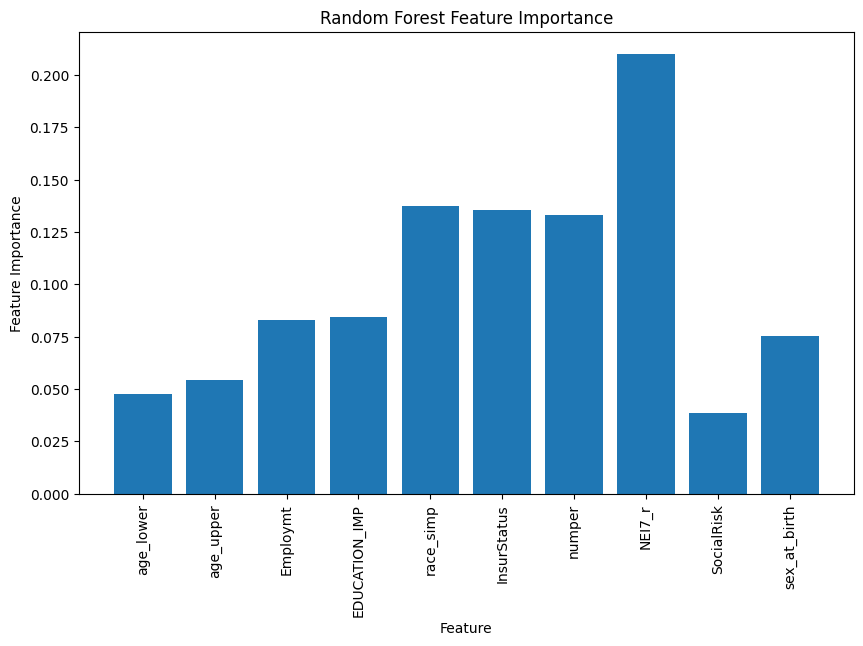

In [148]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [199]:

def custom_map(value):
    if value in ['Don\'t know', 'Missing', 'Other','Refusal']:
        return 'Missing'  # Combine classes 1, 2, and 3 into category 1
    else:
        return value  # Keep other classes as they are

# Apply the mapping to create the 'CombinedClass' column
df['NEI7_r'] = df['NEI7_r'].map(custom_map)

# Create a LabelEncoder and fit it to the 'CombinedClass' column
label_encoder = LabelEncoder()
df['NEI7_r'] = label_encoder.fit_transform(df['NEI7_r'])

# Retrieve the mapping of labels to original values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print(label_mapping)


{'Missing': 0, 'Rural': 1, 'Suburban': 2, 'Urban': 3}


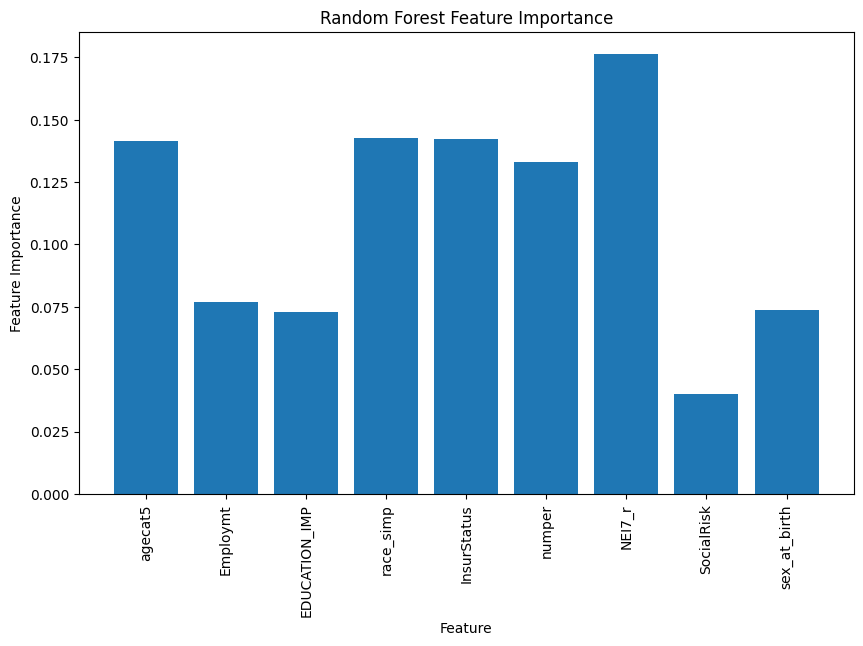

In [201]:
X = df[['agecat5','Employmt','EDUCATION_IMP','race_simp',
               'InsurStatus','numper','NEI7_r','SocialRisk','sex_at_birth']]
Y = df['CON1']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)  # Or use RandomForestRegressor for regression
rf_model.fit(X_train, y_train)

feature_importance = rf_model.feature_importances_

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.show()



In [ ]:
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)